In [9]:
import numpy as np

def sigmoid(z):
    """Сигмоидная функция."""
    return 1 / (1 + np.exp(-z))

def log_loss(w, X, y):
    """
    Вычисляет логистическую функцию потерь и градиент.
    
    Параметры:
    - w: вектор весов модели (размерность [d, 1]).
    - X: матрица признаков (размерность [n, d]).
    - y: вектор истинных меток (размерность [n, 1]).
    
    Возвращает:
    - loss: значение функции потерь.
    - grad: градиент функции потерь по параметрам w.
    """
    n = X.shape[0]  # Количество примеров
    z = np.dot(X, w)  # Линейное предсказание
    A = sigmoid(z)  # Применяем сигмоиду
    
    # Вычисляем функцию потерь
    loss = -np.mean(y * np.log(A + 1e-15) + (1 - y) * np.log(1 - A + 1e-15))
    
    # Вычисляем градиент
    grad = np.dot(X.T, (A - y)) / n
    
    return loss, grad

In [10]:
def optimize(w, X, y, n_iterations, eta):
    """
    Оптимизация весов с помощью градиентного спуска.
    
    Параметры:
    - w: начальный вектор весов (размерность [d, 1]).
    - X: матрица признаков (размерность [n, d]).
    - y: вектор истинных меток (размерность [n, 1]).
    - n_iterations: количество итераций обучения.
    - eta: скорость обучения.
    
    Возвращает:
    - w: оптимизированный вектор весов.
    - losses: список значений функции потерь на каждой итерации.
    """
    losses = []  # Список для хранения значений функции потерь
    
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)  # Вычисляем потери и градиент
        w = w - eta * grad  # Обновляем веса
        losses.append(loss)  # Сохраняем значение потерь
        
        if i % 100 == 0:  # Выводим прогресс каждые 100 итераций
            print(f"Iteration {i}: Loss = {loss}")
    
    return w, losses

In [11]:
def predict(w, X, b=0.5):
    """
    Предсказывает метки классов для новых данных.
    
    Параметры:
    - w: вектор весов модели (размерность [d, 1]).
    - X: матрица признаков (размерность [n, d]).
    - b: пороговое значение для классификации (по умолчанию 0.5).
    
    Возвращает:
    - y_predicted: вектор предсказанных меток (размерность [n, 1]).
    """
    z = np.dot(X, w)  # Линейное предсказание
    A = sigmoid(z)  # Применяем сигмоиду
    y_predicted = (A >= b).astype(int)  # Присваиваем метки на основе порога
    
    return y_predicted

Iteration 0: Loss = 0.6931471805599436
Iteration 100: Loss = 0.2779001001343627
Iteration 200: Loss = 0.20895123944127253
Iteration 300: Loss = 0.17703342864850943
Iteration 400: Loss = 0.15755933442423908
Iteration 500: Loss = 0.1440150874568802
Iteration 600: Loss = 0.13384577596815583
Iteration 700: Loss = 0.1258179072537827
Iteration 800: Loss = 0.11925263208429912
Iteration 900: Loss = 0.11374088725256726


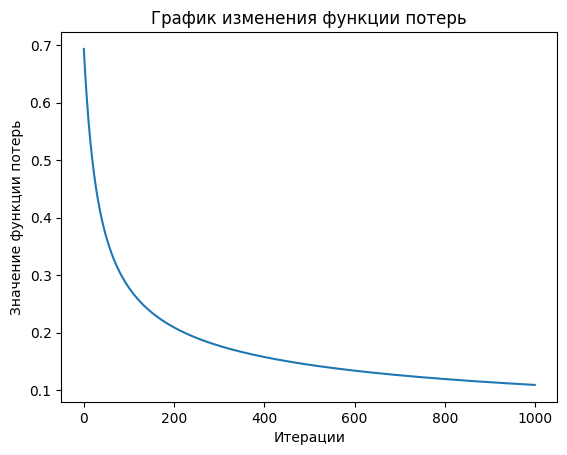

Accuracy: 1.00
Обученные веса:
[[ 3.38174016]
 [-4.21822566]]


In [12]:
# Генерация случайных данных
np.random.seed(42)
n_samples = 100
n_features = 2

X = np.random.randn(n_samples, n_features)
true_w = np.array([[2], [-3]])  # Истинные веса
y = (np.dot(X, true_w) > 0).astype(int)  # Генерация меток

# Инициализация весов
w = np.zeros((n_features, 1))

# Обучение модели
n_iterations = 1000
eta = 0.1
w, losses = optimize(w, X, y, n_iterations, eta)

# Построение графика изменения функции потерь
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses)
plt.xlabel("Итерации")
plt.ylabel("Значение функции потерь")
plt.title("График изменения функции потерь")
plt.show()

# Предсказания и оценка качества
y_pred = predict(w, X)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

# Вывод обученных весов
print("Обученные веса:")
print(w)

### 1. Как влияет размер шага (`eta`) на сходимость алгоритма?

Размер шага (`eta`, или скорость обучения) играет ключевую роль в процессе оптимизации градиентного спуска. Он определяет, насколько сильно веса модели обновляются на каждой итерации.

#### Слишком маленький шаг (`eta`):
- **Плюсы**:
  - Алгоритм более стабильный и менее подвержен риску "перепрыгивания" через минимум функции потерь.
  - Меньше вероятность пропустить локальный минимум (если он существует).
- **Минусы**:
  - Процесс сходимости становится очень медленным.
  - Может потребоваться большое количество итераций для достижения приемлемого уровня точности.
  - Возможна ситуация, когда алгоритм "застрянет" вблизи минимума, но не достигнет его из-за слишком маленьких обновлений.

#### Слишком большой шаг (`eta`):
- **Плюсы**:
  - Быстрая сходимость на начальных этапах.
- **Минусы**:
  - Высокий риск "перепрыгивания" через минимум функции потерь.
  - Возможны колебания вокруг минимума или даже расхождение (функция потерь начинает расти вместо уменьшения).
  - Алгоритм может не сойтись вообще, если шаг слишком велик.

#### Оптимальный выбор `eta`:
- Обычно выбирается эмпирически или с помощью методов автоматической настройки (например, learning rate schedules или адаптивные методы, такие как Adam).
- Хороший подход — начать с небольшого значения (например, 0.01 или 0.1) и постепенно увеличивать его, пока не будет достигнута стабильная сходимость.

---

### 2. Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (`n_iterations`)?

#### Слишком маленькое количество итераций:
- **Проблема**: Алгоритм может завершиться до того, как веса модели сойдутся к оптимальным значениям.
- **Последствия**:
  - Модель будет недообучена (underfitting).
  - Значение функции потерь останется высоким.
  - Качество предсказаний будет низким.

#### Слишком большое количество итераций:
- **Проблема**: Алгоритм будет продолжать работать даже после того, как веса уже сошлись к оптимальным значениям.
- **Последствия**:
  - Лишние вычислительные затраты (время и ресурсы).
  - Если используется фиксированный шаг (`eta`), возможны небольшие колебания вокруг минимума, что может привести к шуму в обучении.
  - Однако, если шаг достаточно мал, это обычно не приводит к значительному ухудшению качества модели.

#### Оптимальное количество итераций:
- Можно использовать раннюю остановку (early stopping): прекращать обучение, когда изменение функции потерь между итерациями становится меньше заданного порога.
- Альтернативно, можно наблюдать за графиком функции потерь и выбирать количество итераций, достаточное для стабилизации значения потерь.

---

### 3. Почему логистическая регрессия подходит только для задач бинарной классификации?

Логистическая регрессия основана на использовании сигмоидной функции, которая преобразует линейное предсказание в вероятность принадлежности объекта к одному из двух классов. Это делает её естественным выбором для задач бинарной классификации.

#### Причины ограничения:
1. **Сигмоидная функция**:
   - Сигмоида ($ \sigma(z) $) возвращает значение в диапазоне [0, 1], которое интерпретируется как вероятность принадлежности объекта к положительному классу (класс 1).
   - Для бинарной классификации это удобно: если вероятность больше 0.5, объект относится к классу 1; иначе — к классу 0.
   - Для многоклассовой классификации такая интерпретация неприменима напрямую.

2. **Функция потерь**:
   - Логарифмическая функция потерь (log loss) разработана для работы с двумя классами. Она штрафует модель за ошибки в предсказании вероятностей для одного из двух классов.
   - Для многоклассовой задачи требуется другая функция потерь, например, категориальная кросс-энтропия.

3. **Отсутствие механизма для нескольких классов**:
   - Логистическая регрессия не предоставляет встроенного способа обработки более двух классов. Для многоклассовой классификации используются другие методы, такие как:
     - **One-vs-Rest (OvR)**: Обучается отдельная модель для каждого класса против всех остальных.
     - **Softmax-регрессия (многоклассовая логистическая регрессия)**: Обобщение логистической регрессии для многоклассовых задач.

#### Альтернативы для многоклассовой классификации:
- **Softmax-регрессия**: Использует softmax-функцию для преобразования линейных предсказаний в вероятности для всех классов.
- **Другие модели**: Например, деревья решений, случайный лес, градиентный бустинг и нейронные сети поддерживают многоклассовую классификацию "из коробки".

---

### Итог

1. Размер шага (`eta`) влияет на скорость и стабильность сходимости. Слишком маленький шаг замедляет обучение, а слишком большой может привести к расхождению.
2. Количество итераций (`n_iterations`) должно быть достаточно большим для сходимости, но не чрезмерно большим, чтобы избежать лишних вычислений.
3. Логистическая регрессия подходит только для бинарной классификации из-за сигмоидной функции и логарифмической функции потерь. Для многоклассовых задач используются другие методы, такие как softmax-регрессия или One-vs-Rest.